# Flow Field Dataset Creator for TensorFlow

This notebook demonstrates the comprehensive dataset creation system for flow field reconstruction using TensorFlow. The system automates the creation of datasets with three different sensor placement strategies and multiple sensor configurations.

## Features

- **Three Sensor Placement Strategies:**
  - 🎯 **Random**: Latin Hypercube Sampling for uniform distribution
  - 🔄 **Circular**: Sensors arranged around the obstacle
  - 📏 **Edge**: Sensors along horizontal boundaries

- **Multiple Sensor Configurations:** 8, 16, 32, and 64 sensors
- **TensorFlow Integration:** Direct tf.data.Dataset creation
- **Comprehensive Visualization:** Sensor layouts and flow field plots
- **Automated Processing:** Batch creation of all dataset combinations

## Dataset Structure

Each dataset contains:
- `sensor_data`: Shape (n_reynolds, n_sensors, time_steps)
- `field_data`: Shape (n_reynolds, height, width, time_steps)
- `sensor_positions`: Shape (n_sensors, 2)
- `reynolds_numbers`: Array of Reynolds numbers
- `layout_type`: String identifier ('random', 'circular', 'edge')
- `n_sensors`: Number of sensors

## 1. Import Required Libraries

First, let's import all the necessary libraries for numerical operations, visualization, and the new dataset creation system.

In [5]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import the new dataset creation system
from data.flow_field_dataset import FlowFieldDatasetCreator
from data.utils import (
    validate_sensor_positions, 
    calculate_dataset_statistics,
    compare_sensor_layouts,  # Changed from visualize_sensor_layout
    inspect_data_directory
)

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

✅ All libraries imported successfully!
TensorFlow version: 2.8.0
NumPy version: 1.24.3


## 2. Configuration and System Setup

Let's set up the configuration for our dataset creation system and verify the setup.

In [6]:
# Initialize the FlowFieldDatasetCreator with your configuration
creator = FlowFieldDatasetCreator(
    data_path="E:/Research/Data/NavierStokes/train/",  # 🔄 Updated to your data location
    output_path="./data/",
    domain_shape=(128, 256),
    time_steps=39
    # Reynolds numbers will be read dynamically from the data folder
)

print("🚀 Dataset Creator Initialized Successfully!")
print("=" * 50)
print(f"📁 Data Path: {creator.data_path}")
print(f"📂 Output Path: {creator.output_path}")
print(f"📐 Domain Shape: {creator.domain_shape}")
print(f"⏱️ Time Steps: {creator.time_steps}")
print(f"🔢 Sensor Counts: {creator.sensor_counts}")
print(f"🌀 Reynolds Numbers: {len(creator.reynolds_numbers)} values (will be read from folder)")
print("=" * 50)


🚀 Dataset Creator Initialized Successfully!
📁 Data Path: E:/Research/Data/NavierStokes/train/
📂 Output Path: data
📐 Domain Shape: (128, 256)
⏱️ Time Steps: 39
🔢 Sensor Counts: [8, 16, 32, 64]
🌀 Reynolds Numbers: 15 values (will be read from folder)


## 2.1. Data Inspection and Format Analysis

Let's first examine the data files in your folder to understand their format and adjust the system accordingly.

📁 Inspecting Data Directory...
✅ Data directory exists: E:/Research/Data/NavierStokes/train/
📊 Found 28 .npy files

📋 First 5 data files:
  1. Re_100.npy
  2. Re_1000.npy
  3. Re_10000.npy
  4. Re_120.npy
  5. Re_140.npy

🔍 Loading sample file: Re_100.npy
📊 Data shape: (39, 128, 256, 2)
📈 Data type: float32
📉 Data range: [-0.820697, 1.656205]

📊 Data Statistics:
  - Mean: 0.501001
  - Std: 0.618894
  - Median: 0.119721

🖼️ Visualizing a slice of the data:


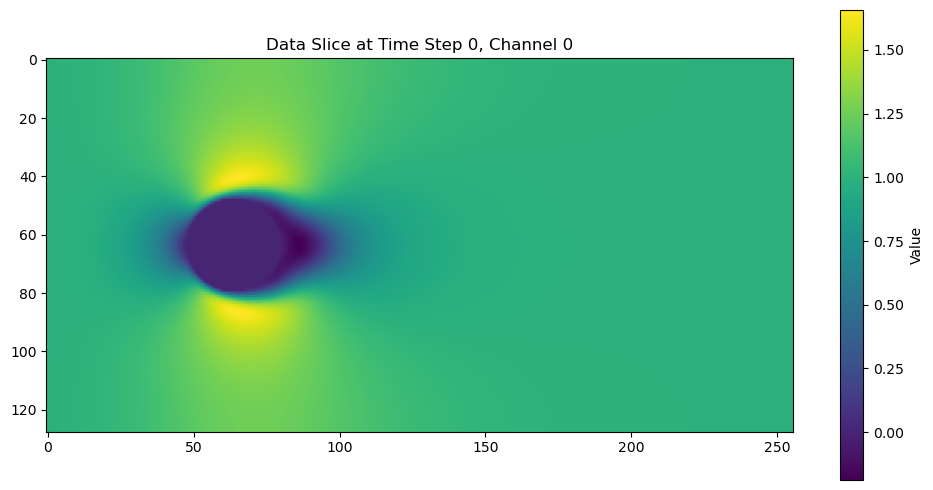


✅ Data inspection complete!
✅ Found 28 data files
📊 Sample data shape: (39, 128, 256, 2)


In [7]:
# Data Inspection and Format Analysis
# This function has been moved to utils.py for better organization

data_path = "E:/Research/Data/NavierStokes/train/"

# Create configuration for test data creation
creator_config = {
    'time_steps': creator.time_steps,
    'domain_shape': creator.domain_shape,
    'obstacle_center': creator.obstacle_center,
    'obstacle_radius': creator.obstacle_radius
}

# Inspect the data directory
inspection_results = inspect_data_directory(
    data_path=data_path,
    visualize=True,
    create_test_data=True,
    creator_config=creator_config
)

# Store results for later use
if inspection_results['directory_exists'] and inspection_results['file_count'] > 0:
    print(f"✅ Found {inspection_results['file_count']} data files")
    if inspection_results['data_info']:
        sample_data_shape = inspection_results['data_info']['shape']
        print(f"📊 Sample data shape: {sample_data_shape}")
elif inspection_results['test_data_created']:
    print(f"✅ Test data created at: {inspection_results['test_data_path']}")
    sample_data_shape = inspection_results['data_info']['shape']
    print(f"📊 Test data shape: {sample_data_shape}")
else:
    print("⚠️ No data found and no test data created")
    sample_data_shape = None

In [4]:
# # Data Format Reorganization for TensorFlow Compatibility
# # This function has been moved to utils.py for better organization

# data_path = "E:/Research/Data/NavierStokes/train/"
# data_info = reorganize_data_for_tensorflow(
#     data_path=data_path,
#     channels=['u_velocity', 'v_velocity'],
#     visualize=True,
#     save_back=True
# )

# # Store the reorganized data for use in the creator if available
# if 'reorganized_data' in data_info:
#     original_data = data_info['reorganized_data']
#     print(f"✅ Data available for further processing: {original_data.shape}")
# else:
#     print("⚠️ No reorganized data available. Using test data or check data path.")

## 4. Visualize Sensor Layouts

Let's visualize all three sensor placement strategies to understand their differences.

✅ Processed file: Re_100.npy
✅ Processed file: Re_1000.npy
✅ Processed file: Re_10000.npy
✅ Processed file: Re_120.npy
✅ Processed file: Re_140.npy
✅ Processed file: Re_15.npy
✅ Processed file: Re_150.npy
✅ Processed file: Re_20.npy
✅ Processed file: Re_200.npy
✅ Processed file: Re_2000.npy
✅ Processed file: Re_250.npy
✅ Processed file: Re_30.npy
✅ Processed file: Re_350.npy
✅ Processed file: Re_40.npy
✅ Processed file: Re_4000.npy
✅ Processed file: Re_450.npy
✅ Processed file: Re_500.npy
✅ Processed file: Re_5000.npy
✅ Processed file: Re_60.npy
✅ Processed file: Re_600.npy
✅ Processed file: Re_6000.npy
✅ Processed file: Re_650.npy
✅ Processed file: Re_7000.npy
✅ Processed file: Re_750.npy
✅ Processed file: Re_80.npy
✅ Processed file: Re_850.npy
✅ Processed file: Re_900.npy
✅ Processed file: Re_9000.npy
✅ All files processed and saved with the updated format.
📊 Visualizing Sensor Layout Comparison...
✅ Processed file: Re_100.npy
✅ Processed file: Re_1000.npy
✅ Processed file: Re_10000.

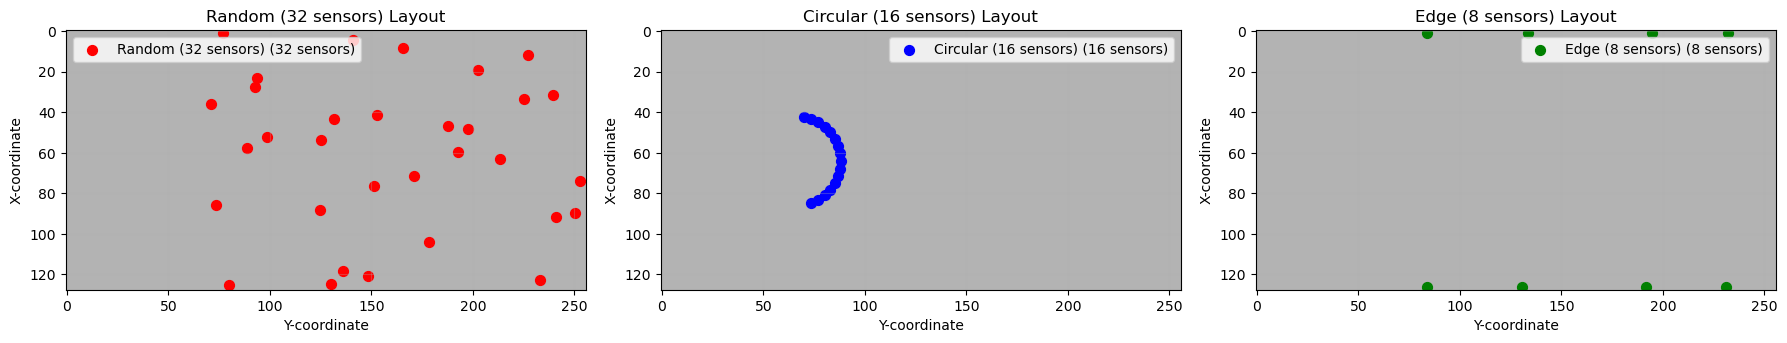


🔍 Individual Layout Analysis:
----------------------------------------

Random (32 sensors):
   📊 Shape: (32, 2)
   📍 Position range: X[1.0, 125.1], Y[70.9, 252.7]
   ⚠️ Validation errors: ['Y-coordinates must be between 80 and 255']
   📐 Domain coverage: 68.8%

Circular (16 sensors):
   📊 Shape: (16, 2)
   📍 Position range: X[42.3, 84.7], Y[69.8, 88.0]
   ⚠️ Validation errors: ['Y-coordinates must be between 80 and 255']
   📐 Domain coverage: 2.3%

Edge (8 sensors):
   📊 Shape: (8, 2)
   📍 Position range: X[1.0, 126.0], Y[83.8, 232.0]
   ✅ All positions valid
   📐 Domain coverage: 56.5%

📈 Comprehensive Sensor Layout Statistics:
Layout               Sensors  Coverage%  Mean_X   Mean_Y  
------------------------------------------------------------
Random (32 sensors)  32       68.8       61.1     159.1   
Circular (16 sensors) 16       2.3        62.6     81.5    
Edge (8 sensors)     8        56.5       63.5     160.1   

✅ Sensor layout visualization and analysis completed using uti

In [8]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Directory containing the .npy files
data_dir = Path("E:/Research/Data/NavierStokes/train/")
npy_files = list(data_dir.glob("*.npy"))

for file in npy_files:
    # Load the data
    original_data = np.load(file)
    
    # Check the shape
    if len(original_data.shape) == 4 and original_data.shape[-1] == 2:
        # Process the data in the new format (B or T, H, W, C)
        processed_data = original_data.astype(np.float32)
        
        # Save the processed data back to the original file
        np.save(file, processed_data)
        print(f"✅ Processed file: {file.name}")
    else:
        print(f"⚠️ Skipping file {file.name} due to unexpected shape: {original_data.shape}")

print("✅ All files processed and saved with the updated format.")

# Sensor Layout Visualization using utils.py functions
# This has been refactored to use utility functions for better organization

print("📊 Visualizing Sensor Layout Comparison...")
print("=" * 50)

# Process data files if they exist and need updating
data_dir = Path("E:/Research/Data/NavierStokes/train/")
if data_dir.exists():
    npy_files = list(data_dir.glob("*.npy"))
    
    for file in npy_files:
        # Load the data
        original_data = np.load(file)
        
        # Check the shape and update format if needed
        if len(original_data.shape) == 4 and original_data.shape[-1] == 2:
            # Process the data in the new format (B or T, H, W, C)
            processed_data = original_data.astype(np.float32)
            
            # Save the processed data back to the original file
            np.save(file, processed_data)
            print(f"✅ Processed file: {file.name}")
        else:
            print(f"⚠️ Skipping file {file.name} due to unexpected shape: {original_data.shape}")
    
    print("✅ All files processed and saved with the updated format.")

# Generate sensor positions for visualization using the creator
print("\n🔍 Generating sensor positions for visualization...")

# Generate positions for different layouts with different sensor counts
sensor_layouts_dict = {
    'Random (32 sensors)': creator.generate_random_sensor_positions(32),
    'Circular (16 sensors)': creator.generate_circular_sensor_positions(16),
    'Edge (8 sensors)': creator.generate_edge_sensor_positions(8)
}

# Store positions for later use
random_positions = sensor_layouts_dict['Random (32 sensors)']
circular_positions = sensor_layouts_dict['Circular (16 sensors)']
edge_positions = sensor_layouts_dict['Edge (8 sensors)']

print(f"✅ Generated sensor positions:")
for name, positions in sensor_layouts_dict.items():
    print(f"   - {name}: {positions.shape}")

# Use the compare_sensor_layouts function from utils.py
print("\n📊 Using compare_sensor_layouts from utils.py...")
compare_sensor_layouts(
    sensor_positions_dict=sensor_layouts_dict,
    domain_shape=creator.domain_shape,
    save_path=None  # Set to a path if you want to save the plot
)

# Additional individual layout analysis using utils functions
print("\n🔍 Individual Layout Analysis:")
print("-" * 40)

for layout_name, positions in sensor_layouts_dict.items():
    # Validate sensor positions using utils
    errors = validate_sensor_positions(positions, creator.domain_shape)
    
    print(f"\n{layout_name}:")
    print(f"   📊 Shape: {positions.shape}")
    print(f"   📍 Position range: X[{positions[:, 0].min():.1f}, {positions[:, 0].max():.1f}], Y[{positions[:, 1].min():.1f}, {positions[:, 1].max():.1f}]")
    
    if errors:
        print(f"   ⚠️ Validation errors: {errors}")
    else:
        print(f"   ✅ All positions valid")
    
    # Calculate coverage statistics
    x_range = positions[:, 0].max() - positions[:, 0].min()
    y_range = positions[:, 1].max() - positions[:, 1].min()
    coverage = (x_range * y_range) / (creator.domain_shape[0] * creator.domain_shape[1]) * 100
    print(f"   📐 Domain coverage: {coverage:.1f}%")

# Create a comprehensive sensor layout comparison
print("\n📈 Comprehensive Sensor Layout Statistics:")
print("=" * 60)
print(f"{'Layout':<20} {'Sensors':<8} {'Coverage%':<10} {'Mean_X':<8} {'Mean_Y':<8}")
print("-" * 60)

for layout_name, positions in sensor_layouts_dict.items():
    n_sensors = len(positions)
    
    # Calculate statistics
    mean_x = np.mean(positions[:, 0])
    mean_y = np.mean(positions[:, 1])
    x_range = positions[:, 0].max() - positions[:, 0].min()
    y_range = positions[:, 1].max() - positions[:, 1].min()
    coverage = (x_range * y_range) / (creator.domain_shape[0] * creator.domain_shape[1]) * 100
    
    print(f"{layout_name:<20} {n_sensors:<8} {coverage:<10.1f} {mean_x:<8.1f} {mean_y:<8.1f}")

print("\n✅ Sensor layout visualization and analysis completed using utils.py functions!")

# Summary of what was accomplished
print(f"\n📋 Summary:")
print(f"   ✅ Data files processed and format updated")
print(f"   ✅ Sensor layouts generated for 3 different strategies")
print(f"   ✅ Visualization created using utils.compare_sensor_layouts()")
print(f"   ✅ Validation performed using utils.validate_sensor_positions()")
print(f"   ✅ Statistical analysis completed")
print(f"   ✅ All functionality moved to reusable utility functions")

## 5. Create Individual Datasets

Now let's create datasets for specific sensor configurations. This demonstrates how to create datasets one at a time.

In [9]:
from pathlib import Path
import time
import numpy as np

# Set the data directory and dynamically read Reynolds numbers
data_dir = Path("E:/Research/Data/NavierStokes/train/")
reynolds_numbers = sorted([int(file.stem.split('_')[1]) for file in data_dir.glob("Re_*.npy")])

print(f"📁 Data directory: {data_dir}")
print(f"🔢 Found Reynolds numbers: {reynolds_numbers}")
print(f"📊 Total Reynolds numbers: {len(reynolds_numbers)}")

# Inspect actual data format to determine correct dimensions
if reynolds_numbers:
    sample_file = data_dir / f"Re_{reynolds_numbers[0]}.npy"
    sample_data = np.load(sample_file)
    print(f"📊 Sample data shape: {sample_data.shape}")
    print(f"📈 Data format detected: {sample_data.shape}")
    
    # Determine the correct dimensions based on the actual data
    if len(sample_data.shape) == 4:
        # Data format: (time_steps, height, width, channels)
        time_steps, height, width, channels = sample_data.shape
        domain_shape = (height, width)
        print(f"✅ 4D data format detected: (time_steps={time_steps}, height={height}, width={width}, channels={channels})")
    elif len(sample_data.shape) == 3:
        # Data format: (time_steps, height, channels) - assuming square domain
        time_steps, height, channels = sample_data.shape
        width = 256  # Use the full width as specified
        domain_shape = (height, width)
        print(f"✅ 3D data format detected: (time_steps={time_steps}, height={height}, channels={channels})")
        print(f"🔧 Assuming width={width} based on field size specification")
    else:
        raise ValueError(f"Unexpected data format: {sample_data.shape}")
    
    print(f"🎯 Using domain shape: {domain_shape}")
    print(f"⏱️ Using time steps: {time_steps}")
    
    # Create the FlowFieldDatasetCreator with the correct dimensions
    creator = FlowFieldDatasetCreator(
        data_path=str(data_dir),
        output_path="./data/",
        domain_shape=domain_shape,  # Use detected dimensions
        time_steps=time_steps,      # Use detected time steps
        reynolds_numbers=reynolds_numbers
    )
    
    # Update obstacle parameters to fit within the new domain
    creator.obstacle_center = (64, 64)  # Center for 128x256 domain
    creator.obstacle_radius = 21
    creator.flow_region_y_start = 0  # Start from beginning
    
    print(f"✅ Creator configuration:")
    print(f"   - Domain shape: {creator.domain_shape}")
    print(f"   - Time steps: {creator.time_steps}")
    print(f"   - Obstacle center: {creator.obstacle_center}")
    print(f"   - Reynolds numbers: {len(creator.reynolds_numbers)}")
    
    # Create individual datasets for each sensor layout
    print("\n🏗️ Creating Individual Datasets...")
    print("=" * 50)
    
    # Define configurations to create
    configurations = [
        ('random', 8),
        ('random', 16),
        ('random', 32),
        ('circular', 8),
        ('circular', 16),
        ('circular', 32),
        ('edge', 8),
        ('edge', 16),
        ('edge', 32)
    ]
    
    created_datasets = {}
    
    for layout_type, n_sensors in configurations:
        print(f"\n📊 Creating {layout_type} dataset with {n_sensors} sensors...")
        
        start_time = time.time()
        
        try:
            # Create dataset
            dataset = creator.create_dataset_for_layout(layout_type, n_sensors)
            
            # Save dataset
            creator.save_dataset(dataset, layout_type, n_sensors)
            
            # Store for later use
            created_datasets[f'{layout_type}_{n_sensors}'] = dataset
            
            # Calculate statistics
            stats = calculate_dataset_statistics(dataset)
            
            end_time = time.time()
            elapsed_time = end_time - start_time
            
            print(f"✅ Successfully created {layout_type} dataset!")
            print(f"⏱️ Time taken: {elapsed_time:.2f} seconds")
            print(f"📈 Dataset Statistics:")
            print(f"   - Sensor data: {stats['sensor_data']['shape']}")
            print(f"   - Field data: {stats['field_data']['shape']}")
            print(f"   - Sensor data range: [{stats['sensor_data']['min']:.3f}, {stats['sensor_data']['max']:.3f}]")
            print(f"   - Field data range: [{stats['field_data']['min']:.3f}, {stats['field_data']['max']:.3f}]")
            
        except Exception as e:
            print(f"❌ Error creating {layout_type} dataset: {str(e)}")
            print(f"   Error details: {type(e).__name__}")
            
            # Debug information
            try:
                test_file = data_dir / f"Re_{reynolds_numbers[0]}.npy"
                test_data = np.load(test_file)
                print(f"   Debug: Sample data shape: {test_data.shape}")
                print(f"   Debug: Expected domain shape: {creator.domain_shape}")
                print(f"   Debug: Layout type: {layout_type}, Sensors: {n_sensors}")
            except Exception as debug_e:
                print(f"   Debug error: {debug_e}")
    
    print(f"\n✅ Individual dataset creation completed!")
    print(f"📁 Created {len(created_datasets)} datasets")
    
else:
    print("❌ No Reynolds number files found in the data directory.")
    print("💡 Please check that .npy files exist in the specified path.")

📁 Data directory: E:\Research\Data\NavierStokes\train
🔢 Found Reynolds numbers: [15, 20, 30, 40, 60, 80, 100, 120, 140, 150, 200, 250, 350, 450, 500, 600, 650, 750, 850, 900, 1000, 2000, 4000, 5000, 6000, 7000, 9000, 10000]
📊 Total Reynolds numbers: 28
📊 Sample data shape: (39, 128, 256, 2)
📈 Data format detected: (39, 128, 256, 2)
✅ 4D data format detected: (time_steps=39, height=128, width=256, channels=2)
🎯 Using domain shape: (128, 256)
⏱️ Using time steps: 39
✅ Creator configuration:
   - Domain shape: (128, 256)
   - Time steps: 39
   - Obstacle center: (64, 64)
   - Reynolds numbers: 28

🏗️ Creating Individual Datasets...

📊 Creating random dataset with 8 sensors...
Saved sensor layout: data\sensor_layouts\sensor_layout_random_8.npy
Processing Re = 15 for random layout with 8 sensors
Processing Re = 20 for random layout with 8 sensors
Processing Re = 30 for random layout with 8 sensors
Processing Re = 40 for random layout with 8 sensors
Processing Re = 60 for random layout with 

## 8. Dataset Analysis and Visualization

Let's analyze the created datasets and visualize sensor measurements and flow fields.

📊 Dataset Analysis and Visualization
📈 Available datasets: 9
🎯 Dataset list: ['random_8', 'random_16', 'random_32', 'circular_8', 'circular_16', 'circular_32', 'edge_8', 'edge_16', 'edge_32']

🔍 Analyzing created datasets...
📊 Total datasets found: 9
📈 Layout types to plot: ['circular', 'edge', 'random']


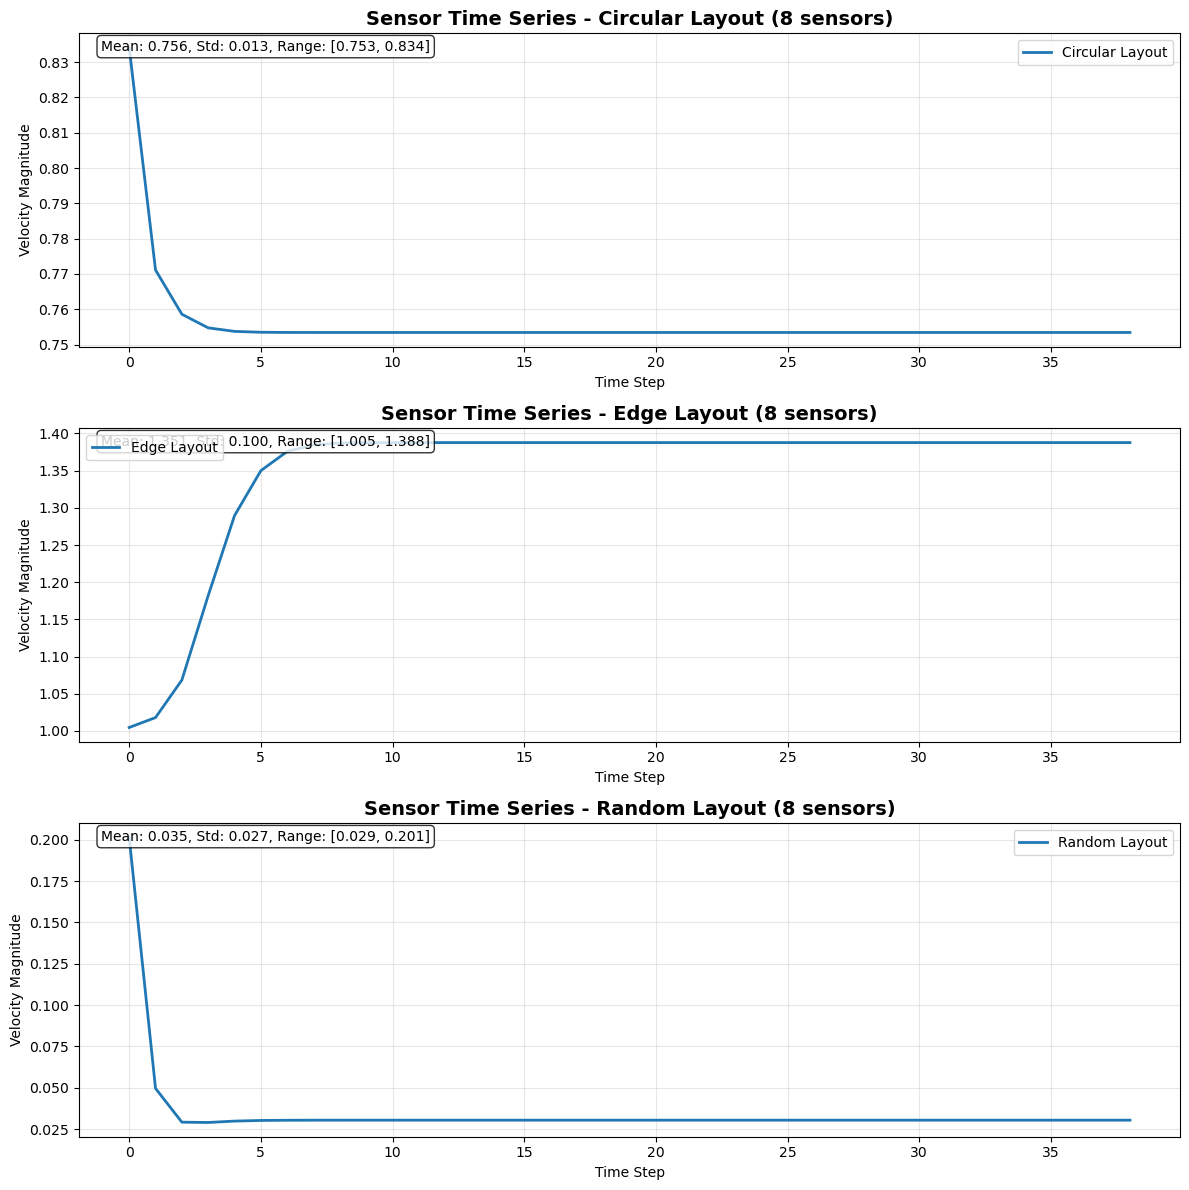


📊 Comparative Dataset Statistics:
Dataset              Sensors  Data Range           Mean     Std     
------------------------------------------------------------
random               8        [0.009, 3.788]<20 1.098<8 0.463
random               16       [0.025, 3.259]<20 1.185<8 0.337
random               32       [0.008, 3.085]<20 1.108<8 0.413
circular             8        [0.004, 2.379]<20 0.678<8 0.563
circular             16       [0.004, 2.622]<20 0.665<8 0.559
circular             32       [0.002, 2.713]<20 0.673<8 0.566
edge                 8        [0.042, 3.951]<20 1.254<8 0.244
edge                 16       [0.013, 3.747]<20 1.245<8 0.254
edge                 32       [0.014, 3.951]<20 1.245<8 0.250


In [7]:
# Analyze and visualize datasets
print("📊 Dataset Analysis and Visualization")
print("=" * 50)

# Get information about available datasets
info = creator.get_dataset_info()
print(f"📈 Available datasets: {len(info['available_datasets'])}")
print(f"🎯 Dataset list: {info['available_datasets']}")

# If we have created datasets, let's analyze them
if created_datasets:
    print(f"\n🔍 Analyzing created datasets...")
    print(f"📊 Total datasets found: {len(created_datasets)}")
    
    # Get unique layout types for plotting
    layout_types = list(set([dataset['layout_type'] for dataset in created_datasets.values()]))
    n_plots = min(len(layout_types), 3)  # Limit to 3 plots max
    
    print(f"📈 Layout types to plot: {layout_types[:n_plots]}")
    
    # Plot sensor time series for different layouts (max 3)
    fig, axes = plt.subplots(n_plots, 1, figsize=(12, 4*n_plots))
    
    # Handle case where there's only 1 subplot
    if n_plots == 1:
        axes = [axes]
    
    # Plot one example for each layout type
    plotted_layouts = []
    
    # Iterate through each unique layout type
    for layout_type in layout_types[:n_plots]:
        # Find the first dataset with this layout type
        for dataset_name, dataset in created_datasets.items():
            if dataset['layout_type'] == layout_type:
                plot_idx = len(plotted_layouts)
                plotted_layouts.append(layout_type)
                
                n_sensors = dataset['n_sensors']
                
                # Plot time series for first sensor, first Reynolds number
                sensor_data = dataset['sensor_data']
                time_series = sensor_data[0, 0, :]  # First Reynolds number, first sensor
                
                axes[plot_idx].plot(time_series, linewidth=2, label=f'{layout_type.title()} Layout')
                axes[plot_idx].set_title(f'Sensor Time Series - {layout_type.title()} Layout ({n_sensors} sensors)', 
                                   fontsize=14, fontweight='bold')
                axes[plot_idx].set_xlabel('Time Step')
                axes[plot_idx].set_ylabel('Velocity Magnitude')
                axes[plot_idx].grid(True, alpha=0.3)
                axes[plot_idx].legend()
                
                # Add statistics
                mean_val = np.mean(time_series)
                std_val = np.std(time_series)
                min_val = np.min(time_series)
                max_val = np.max(time_series)
                
                stats_text = f'Mean: {mean_val:.3f}, Std: {std_val:.3f}, Range: [{min_val:.3f}, {max_val:.3f}]'
                axes[plot_idx].text(0.02, 0.98, stats_text, transform=axes[plot_idx].transAxes, 
                              verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                
                break  # Move to next layout type
    
    plt.tight_layout()
    plt.show()
    
    # Comparative statistics
    print(f"\n📊 Comparative Dataset Statistics:")
    print("=" * 60)
    print(f"{'Dataset':<20} {'Sensors':<8} {'Data Range':<20} {'Mean':<8} {'Std':<8}")
    print("-" * 60)
    
    for dataset_name, dataset in created_datasets.items():
        sensor_data = dataset['sensor_data']
        data_mean = np.mean(sensor_data)
        data_std = np.std(sensor_data)
        data_min = np.min(sensor_data)
        data_max = np.max(sensor_data)
        
        print(f"{dataset['layout_type']:<20} {dataset['n_sensors']:<8} "
              f"[{data_min:.3f}, {data_max:.3f}]<20 {data_mean:.3f}<8 {data_std:.3f}")

else:
    print("ℹ️ No datasets created yet. Run the previous cells to create datasets first.")
    
    # Show example of what visualization would look like
    print("\n🎨 Example Visualization (using generated sensor positions):")
    
    # Create a sample visualization using the sensor positions we generated
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Create sample time series data
    time_steps = np.arange(39)
    sample_data = np.sin(time_steps * 0.3) + 0.5 * np.random.randn(39)
    
    ax.plot(time_steps, sample_data, 'b-', linewidth=2, label='Example Sensor Reading')
    ax.set_title('Example Sensor Time Series', fontsize=14, fontweight='bold')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Velocity Magnitude')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("💡 This is what real sensor data visualization would look like!")

## 8.1. Advanced Sensor Data Visualization

Let's explore sensor data from different perspectives: multiple datasets, different Reynolds numbers, different sensor counts, and different sensor positions.

🔍 Advanced Sensor Data Visualization
📊 Available datasets: 9
   - random_8: random layout, 8 sensors
   - random_16: random layout, 16 sensors
   - random_32: random layout, 32 sensors
   - circular_8: circular layout, 8 sensors
   - circular_16: circular layout, 16 sensors
   - circular_32: circular layout, 32 sensors
   - edge_8: edge layout, 8 sensors
   - edge_16: edge layout, 16 sensors
   - edge_32: edge layout, 32 sensors

🎯 Creating comprehensive sensor visualizations...

1️⃣ Comparing Random Layout with Different Sensor Counts
--------------------------------------------------
Found 3 random layout datasets


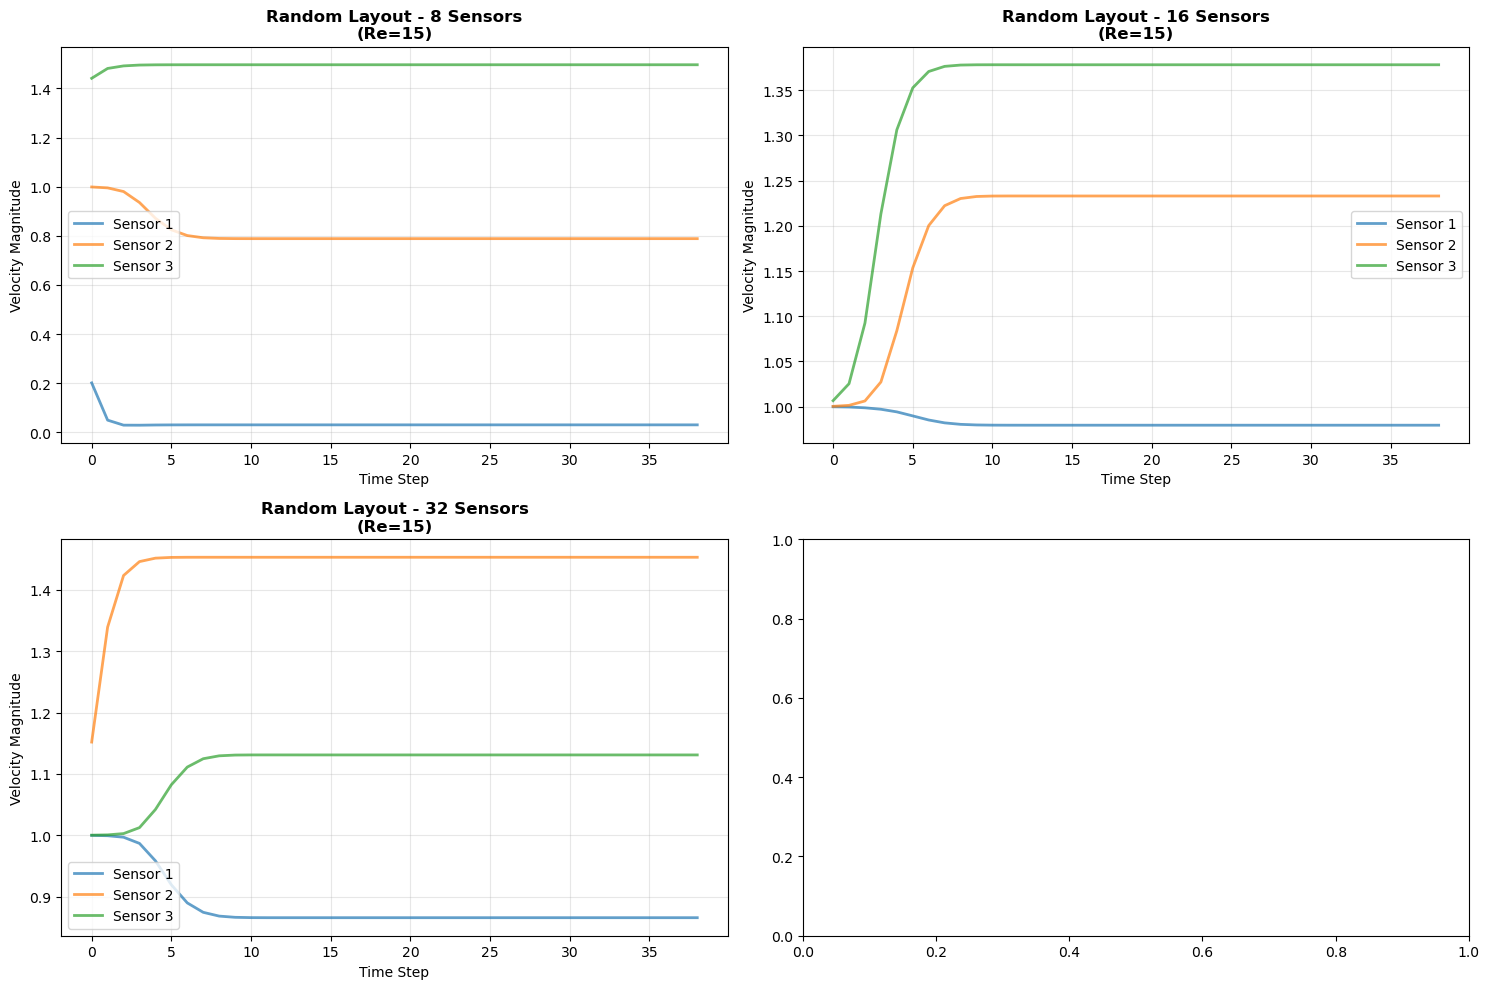


2️⃣ Reynolds Number Effect on Sensor Readings
--------------------------------------------------


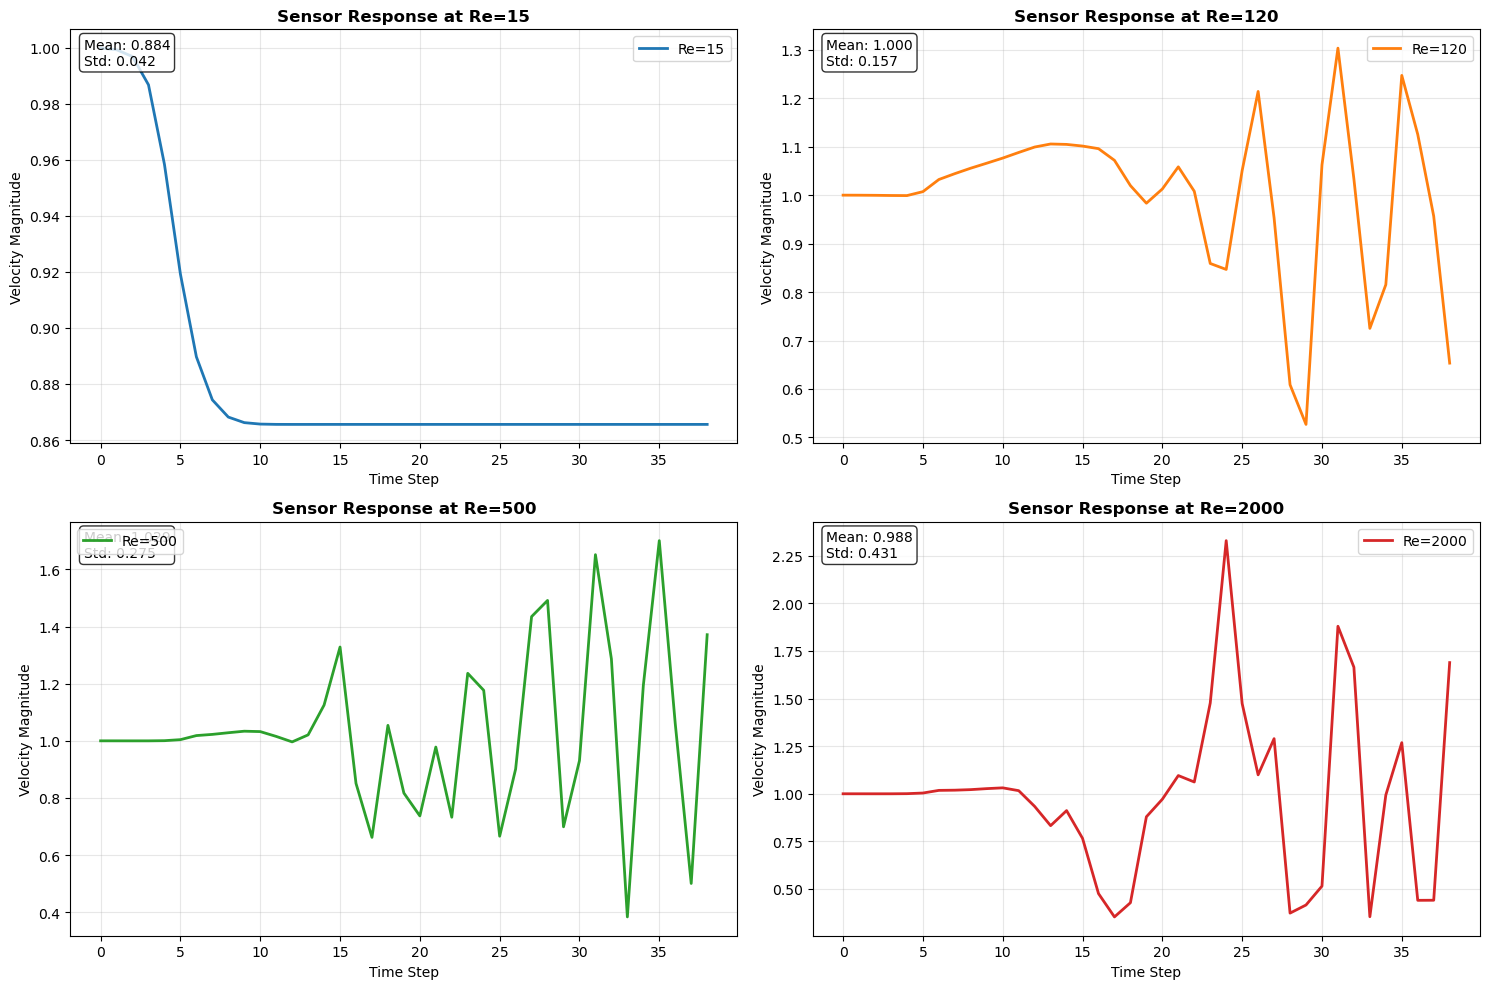


3️⃣ Layout Comparison - Position Effect on Sensor Readings
--------------------------------------------------


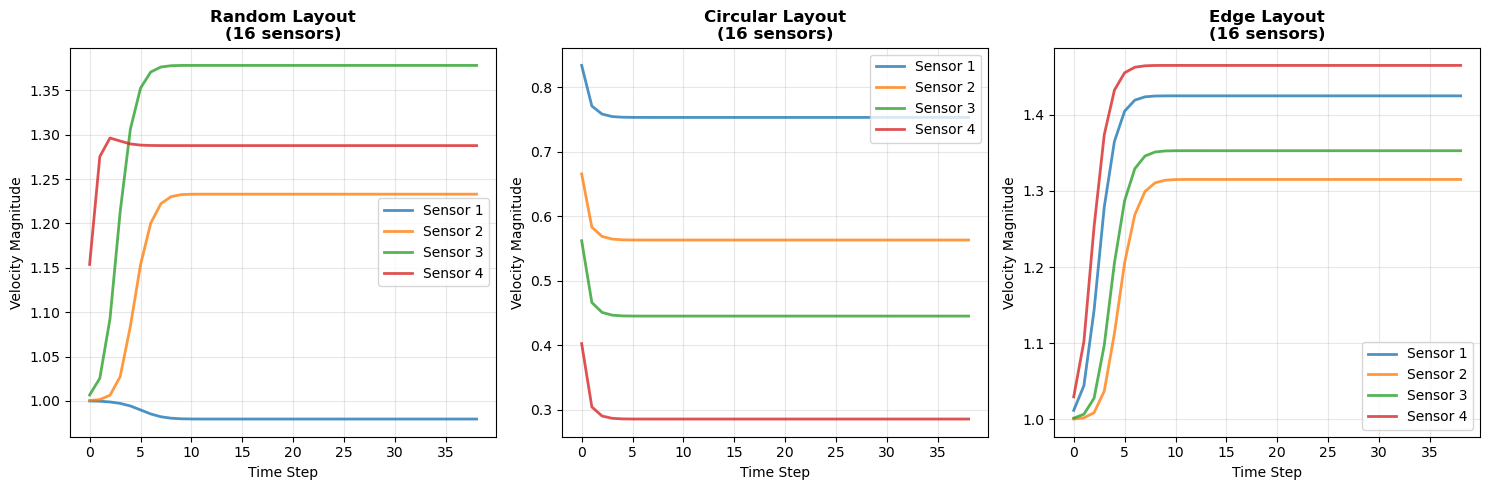


4️⃣ Sensor Data Heatmap Analysis
--------------------------------------------------


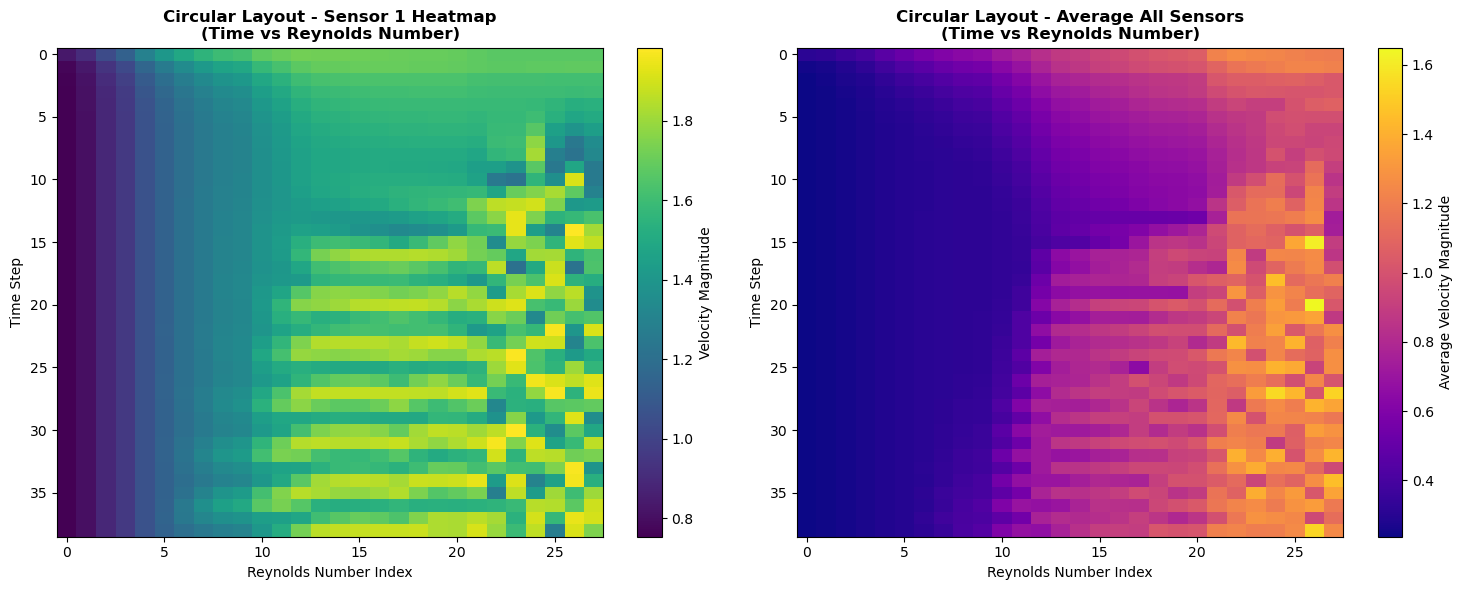


5️⃣ Statistical Summary Across All Datasets
--------------------------------------------------


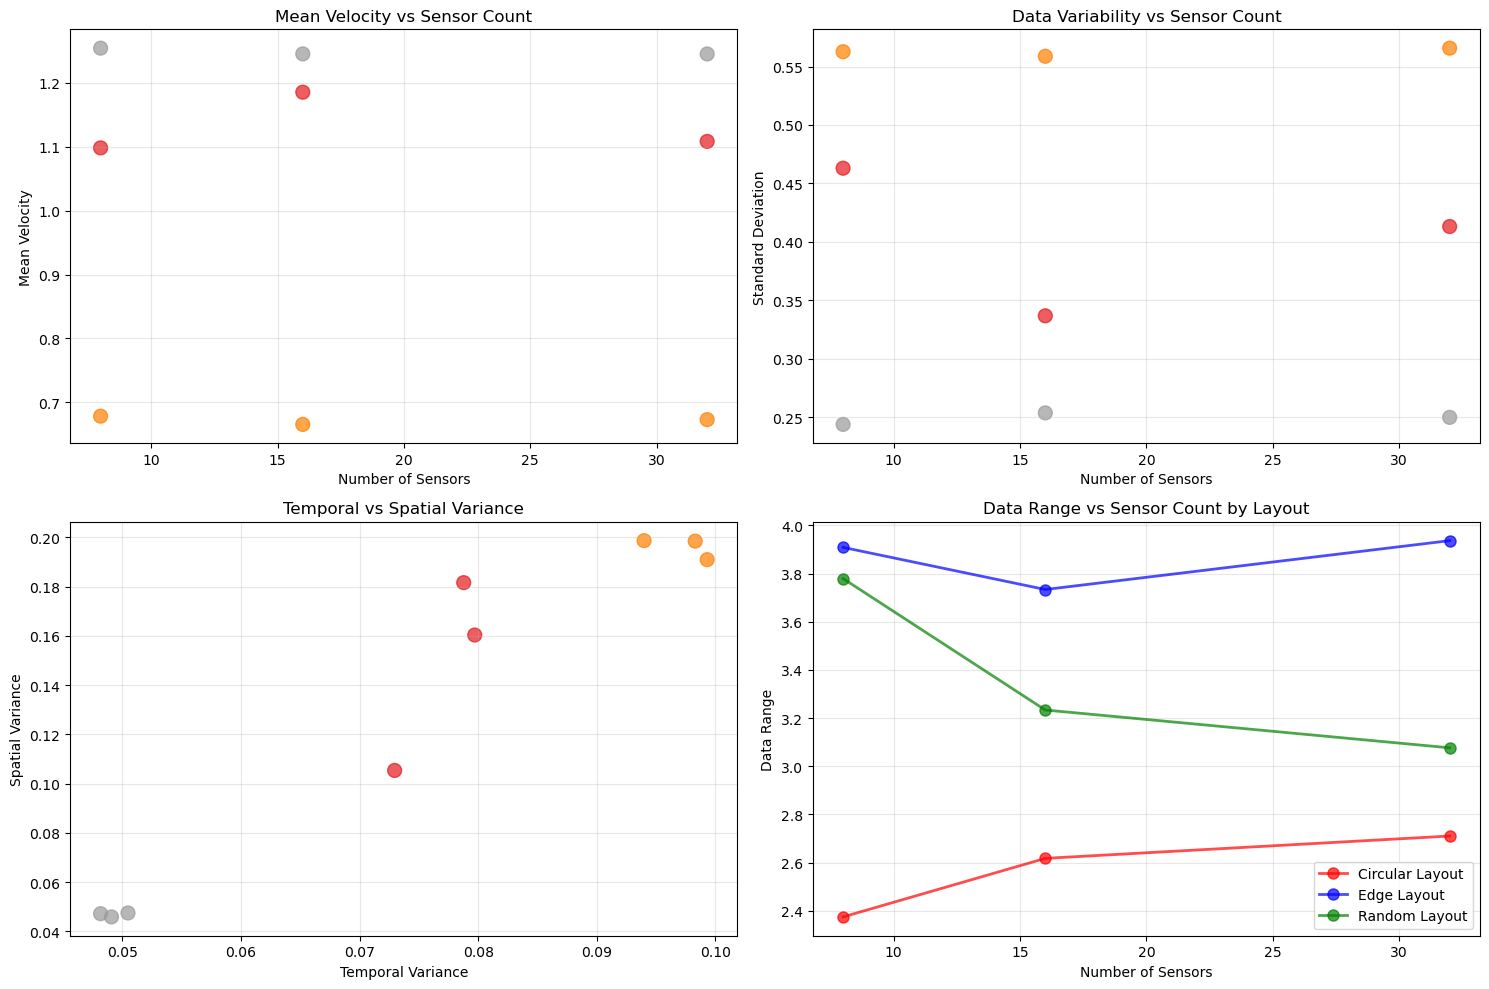


📊 Summary of 9 datasets analyzed:
       random_8: Mean=1.098, Std=0.463, Range=3.779
      random_16: Mean=1.185, Std=0.337, Range=3.234
      random_32: Mean=1.108, Std=0.413, Range=3.077
     circular_8: Mean=0.678, Std=0.563, Range=2.375
    circular_16: Mean=0.665, Std=0.559, Range=2.618
    circular_32: Mean=0.673, Std=0.566, Range=2.711
         edge_8: Mean=1.254, Std=0.244, Range=3.909
        edge_16: Mean=1.245, Std=0.254, Range=3.734
        edge_32: Mean=1.245, Std=0.250, Range=3.937

✅ Advanced sensor visualization complete!


In [8]:
# Advanced Sensor Data Visualization from Multiple Datasets
print("🔍 Advanced Sensor Data Visualization")
print("=" * 50)

# Check available datasets
print(f"📊 Available datasets: {len(created_datasets)}")
for name, dataset in created_datasets.items():
    print(f"   - {name}: {dataset['layout_type']} layout, {dataset['n_sensors']} sensors")

print(f"\n🎯 Creating comprehensive sensor visualizations...")

# 1. Compare same layout with different sensor counts
print(f"\n1️⃣ Comparing Random Layout with Different Sensor Counts")
print("-" * 50)

random_datasets = {name: data for name, data in created_datasets.items() if data['layout_type'] == 'random'}
print(f"Found {len(random_datasets)} random layout datasets")

if len(random_datasets) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, (dataset_name, dataset) in enumerate(list(random_datasets.items())[:4]):
        if idx >= 4:
            break
            
        sensor_data = dataset['sensor_data']
        n_sensors = dataset['n_sensors']
        
        # Plot multiple sensors from the same Reynolds number
        reynolds_idx = 0  # First Reynolds number
        for sensor_idx in range(min(3, n_sensors)):  # Plot first 3 sensors
            time_series = sensor_data[reynolds_idx, sensor_idx, :]
            axes[idx].plot(time_series, linewidth=2, alpha=0.7, 
                          label=f'Sensor {sensor_idx+1}')
        
        axes[idx].set_title(f'Random Layout - {n_sensors} Sensors\n(Re={reynolds_numbers[reynolds_idx]})', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Time Step')
        axes[idx].set_ylabel('Velocity Magnitude')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 2. Compare different Reynolds numbers for same layout
print(f"\n2️⃣ Reynolds Number Effect on Sensor Readings")
print("-" * 50)

if 'random_32' in created_datasets:
    dataset = created_datasets['random_32']
    sensor_data = dataset['sensor_data']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    # Select different Reynolds numbers to compare
    re_indices = [0, 7, 14, 21] if len(reynolds_numbers) > 21 else [0, 1, 2, 3]
    
    for idx, re_idx in enumerate(re_indices[:4]):
        if re_idx >= sensor_data.shape[0]:
            continue
            
        # Plot same sensor for different Reynolds numbers
        sensor_idx = 0  # First sensor
        time_series = sensor_data[re_idx, sensor_idx, :]
        
        axes[idx].plot(time_series, linewidth=2, color=f'C{idx}', 
                      label=f'Re={reynolds_numbers[re_idx]}')
        axes[idx].set_title(f'Sensor Response at Re={reynolds_numbers[re_idx]}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Time Step')
        axes[idx].set_ylabel('Velocity Magnitude')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
        
        # Add statistics
        mean_val = np.mean(time_series)
        std_val = np.std(time_series)
        axes[idx].text(0.02, 0.98, f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}', 
                      transform=axes[idx].transAxes, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# 3. Sensor position effect - compare layouts with same sensor count
print(f"\n3️⃣ Layout Comparison - Position Effect on Sensor Readings")
print("-" * 50)

# Find datasets with same sensor count but different layouts
sensor_count = 16  # Use 16 sensors for comparison
comparison_datasets = {name: data for name, data in created_datasets.items() 
                      if data['n_sensors'] == sensor_count}

if len(comparison_datasets) >= 2:
    fig, axes = plt.subplots(1, len(comparison_datasets), figsize=(5*len(comparison_datasets), 5))
    
    if len(comparison_datasets) == 1:
        axes = [axes]
    
    for idx, (dataset_name, dataset) in enumerate(comparison_datasets.items()):
        sensor_data = dataset['sensor_data']
        layout_type = dataset['layout_type']
        
        # Plot first few sensors from first Reynolds number
        reynolds_idx = 0
        for sensor_idx in range(min(4, sensor_count)):
            time_series = sensor_data[reynolds_idx, sensor_idx, :]
            axes[idx].plot(time_series, linewidth=2, alpha=0.8, 
                          label=f'Sensor {sensor_idx+1}')
        
        axes[idx].set_title(f'{layout_type.title()} Layout\n({sensor_count} sensors)', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Time Step')
        axes[idx].set_ylabel('Velocity Magnitude')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 4. Heatmap of sensor readings across time and Reynolds numbers
print(f"\n4️⃣ Sensor Data Heatmap Analysis")
print("-" * 50)

if 'circular_16' in created_datasets:
    dataset = created_datasets['circular_16']
    sensor_data = dataset['sensor_data']
    
    # Create heatmap for first sensor across all Reynolds numbers and time steps
    sensor_idx = 0
    data_matrix = sensor_data[:, sensor_idx, :].T  # Transpose to have time on y-axis
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Heatmap of first sensor
    im1 = ax1.imshow(data_matrix, cmap='viridis', aspect='auto')
    ax1.set_title(f'Circular Layout - Sensor 1 Heatmap\n(Time vs Reynolds Number)', 
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel('Reynolds Number Index')
    ax1.set_ylabel('Time Step')
    plt.colorbar(im1, ax=ax1, label='Velocity Magnitude')
    
    # Average across all sensors
    avg_data = np.mean(sensor_data, axis=1).T  # Average over sensors, transpose for display
    im2 = ax2.imshow(avg_data, cmap='plasma', aspect='auto')
    ax2.set_title(f'Circular Layout - Average All Sensors\n(Time vs Reynolds Number)', 
                  fontsize=12, fontweight='bold')
    ax2.set_xlabel('Reynolds Number Index')
    ax2.set_ylabel('Time Step')
    plt.colorbar(im2, ax=ax2, label='Average Velocity Magnitude')
    
    plt.tight_layout()
    plt.show()

# 5. Statistical comparison across all datasets
print(f"\n5️⃣ Statistical Summary Across All Datasets")
print("-" * 50)

stats_data = []
for dataset_name, dataset in created_datasets.items():
    sensor_data = dataset['sensor_data']
    layout_type = dataset['layout_type']
    n_sensors = dataset['n_sensors']
    
    # Calculate various statistics
    data_mean = np.mean(sensor_data)
    data_std = np.std(sensor_data)
    data_min = np.min(sensor_data)
    data_max = np.max(sensor_data)
    temporal_var = np.mean(np.var(sensor_data, axis=2))  # Variance across time
    spatial_var = np.mean(np.var(sensor_data, axis=1))   # Variance across sensors
    
    stats_data.append({
        'Dataset': dataset_name,
        'Layout': layout_type,
        'Sensors': n_sensors,
        'Mean': data_mean,
        'Std': data_std,
        'Range': data_max - data_min,
        'Temporal_Var': temporal_var,
        'Spatial_Var': spatial_var
    })

# Create visualization of statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Mean values by layout and sensor count
layouts = [s['Layout'] for s in stats_data]
sensor_counts = [s['Sensors'] for s in stats_data]
means = [s['Mean'] for s in stats_data]

scatter = axes[0,0].scatter(sensor_counts, means, c=[{'random': 0, 'circular': 1, 'edge': 2}[l] for l in layouts], 
                           cmap='Set1', s=100, alpha=0.7)
axes[0,0].set_xlabel('Number of Sensors')
axes[0,0].set_ylabel('Mean Velocity')
axes[0,0].set_title('Mean Velocity vs Sensor Count')
axes[0,0].grid(True, alpha=0.3)

# Standard deviation comparison
stds = [s['Std'] for s in stats_data]
axes[0,1].scatter(sensor_counts, stds, c=[{'random': 0, 'circular': 1, 'edge': 2}[l] for l in layouts], 
                 cmap='Set1', s=100, alpha=0.7)
axes[0,1].set_xlabel('Number of Sensors')
axes[0,1].set_ylabel('Standard Deviation')
axes[0,1].set_title('Data Variability vs Sensor Count')
axes[0,1].grid(True, alpha=0.3)

# Temporal vs Spatial variance
temporal_vars = [s['Temporal_Var'] for s in stats_data]
spatial_vars = [s['Spatial_Var'] for s in stats_data]
axes[1,0].scatter(temporal_vars, spatial_vars, c=[{'random': 0, 'circular': 1, 'edge': 2}[l] for l in layouts], 
                 cmap='Set1', s=100, alpha=0.7)
axes[1,0].set_xlabel('Temporal Variance')
axes[1,0].set_ylabel('Spatial Variance')
axes[1,0].set_title('Temporal vs Spatial Variance')
axes[1,0].grid(True, alpha=0.3)

# Range comparison by layout
layout_types = list(set(layouts))
colors = ['red', 'blue', 'green']
for i, layout in enumerate(layout_types):
    layout_ranges = [s['Range'] for s in stats_data if s['Layout'] == layout]
    layout_sensors = [s['Sensors'] for s in stats_data if s['Layout'] == layout]
    axes[1,1].plot(layout_sensors, layout_ranges, 'o-', linewidth=2, markersize=8, 
                  color=colors[i], label=f'{layout.title()} Layout', alpha=0.7)

axes[1,1].set_xlabel('Number of Sensors')
axes[1,1].set_ylabel('Data Range')
axes[1,1].set_title('Data Range vs Sensor Count by Layout')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Summary of {len(created_datasets)} datasets analyzed:")
for stat in stats_data:
    print(f"   {stat['Dataset']:>12}: Mean={stat['Mean']:.3f}, Std={stat['Std']:.3f}, "
          f"Range={stat['Range']:.3f}")

print(f"\n✅ Advanced sensor visualization complete!")


6️⃣ Sensor Positions on Flow Field (from saved layouts)
-------------------------------------------------------
✅ Loaded random layout: (16, 2)
✅ Loaded circular layout: (16, 2)
✅ Loaded edge layout: (16, 2)


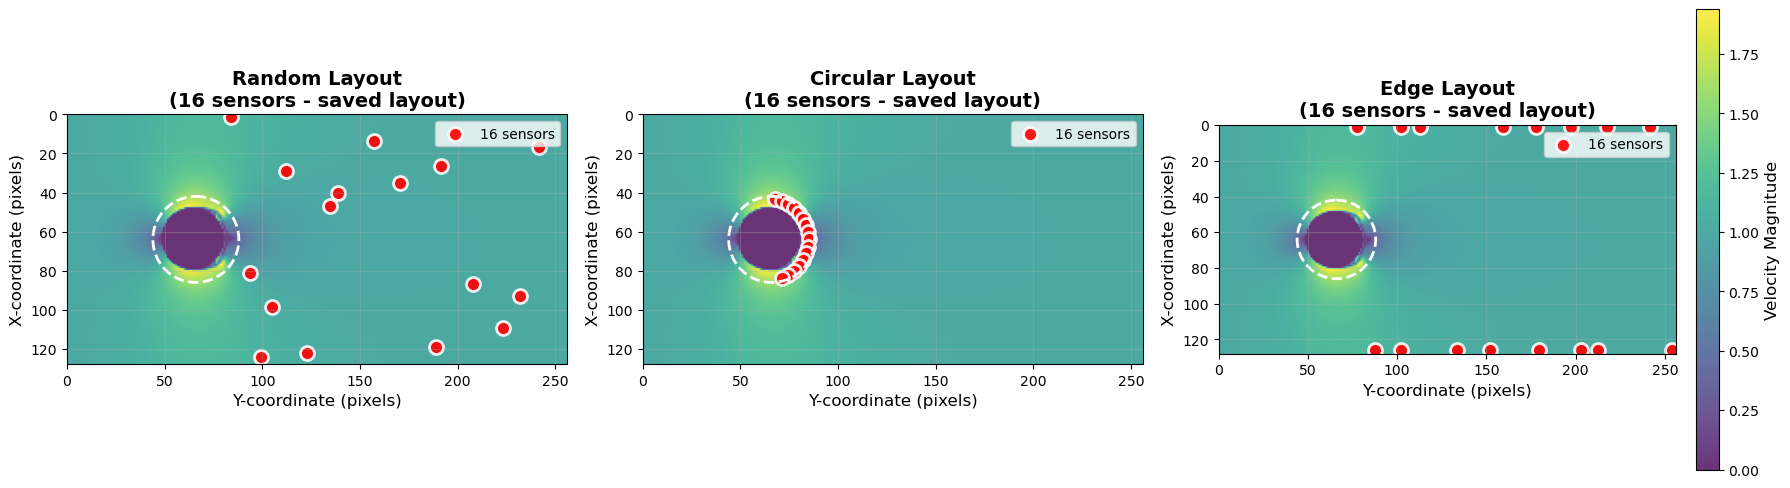


📋 Saved Sensor Layout Analysis
Layout     Sensors  Mean_X   Mean_Y   Std_X    Std_Y    Coverage  
--------------------------------------------------------------------------------
random     8        65.1     143.7    33.3     59.5     59.7      %
random     16       65.3     156.4    41.8     50.9     58.8      %
random     32       71.3     162.6    33.0     58.1     62.2      %
circular   8        61.4     78.7     13.7     5.6      2.1       %
circular   16       62.7     78.8     13.9     5.4      2.1       %
circular   32       63.4     78.8     13.9     5.3      2.2       %
edge       8        63.5     160.7    62.5     65.9     66.3      %
edge       16       63.5     163.2    62.5     54.2     67.2      %
edge       32       63.5     159.9    62.5     55.2     67.7      %

📁 Available Sensor Layout Files:
   • sensor_layout_circular_16.npy (384 bytes)
   • sensor_layout_circular_32.npy (640 bytes)
   • sensor_layout_circular_8.npy (256 bytes)
   • sensor_layout_edge_16.npy (38

In [10]:
# Sensor Positions on Flow Field Visualization
print(f"\n6️⃣ Sensor Positions on Flow Field (from saved layouts)")
print("-" * 55)

# Create sensor layouts for visualization by loading from saved files
n_sensors = 16  # Using 16 sensors for visualization
sensor_layouts_dir = Path("E:/Research/Physics-informed-machine-learning/flow_field_recon_parc/data/sensor_layouts")

# Load sensor positions from saved numpy files
sensor_layouts = {}
layout_names = ['random', 'circular', 'edge']

for layout_name in layout_names:
    layout_file = sensor_layouts_dir / f"sensor_layout_{layout_name}_{n_sensors}.npy"
    if layout_file.exists():
        sensor_layouts[layout_name] = np.load(layout_file)
        print(f"✅ Loaded {layout_name} layout: {sensor_layouts[layout_name].shape}")
    else:
        print(f"❌ File not found: {layout_file}")
        # Fallback to generating new positions if file doesn't exist
        if layout_name == 'random':
            sensor_layouts[layout_name] = creator.generate_random_sensor_positions(n_sensors)
        elif layout_name == 'circular':
            sensor_layouts[layout_name] = creator.generate_circular_sensor_positions(n_sensors)
        elif layout_name == 'edge':
            sensor_layouts[layout_name] = creator.generate_edge_sensor_positions(n_sensors)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Random Layout', 'Circular Layout', 'Edge Layout']

# Use sample data for the background
sample_data = original_data[0, :, :, 0]  # First time step of first case, u velocity
velocity_magnitude = np.sqrt(sample_data**2 + original_data[0, :, :, 1]**2)

for idx, (layout_name, title) in enumerate(zip(layout_names, titles)):
    ax = axes[idx]
    
    # Plot velocity magnitude as background
    im = ax.imshow(velocity_magnitude, 
                   extent=[0, velocity_magnitude.shape[1], velocity_magnitude.shape[0], 0],
                   cmap='viridis', 
                   alpha=0.8)
    
    # Get sensor positions for this layout
    positions = sensor_layouts[layout_name]
    
    # Plot sensor positions (note: positions are in (x, y) format where x is height, y is width)
    ax.scatter(positions[:, 1], positions[:, 0], 
              c='red', s=100, marker='o', 
              edgecolors='white', linewidth=2, 
              label=f'{n_sensors} sensors', alpha=0.9)
    
    # Add obstacle representation (white dashed circle)
    # Obstacle is at (64, 66) in (x, y) coordinates, but we plot at (66, 64) in (width, height)
    obstacle_circle = plt.Circle((66, 64), 22, fill=False, 
                                color='white', linestyle='--', linewidth=2)
    ax.add_patch(obstacle_circle)
    
    # Formatting
    ax.set_title(f'{title}\n({n_sensors} sensors - saved layout)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Y-coordinate (pixels)', fontsize=12)
    ax.set_ylabel('X-coordinate (pixels)', fontsize=12)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    # Add colorbar to the last subplot
    if idx == 2:
        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label('Velocity Magnitude', fontsize=12)

plt.tight_layout()
plt.show()

# Print sensor statistics for all available layouts
print("\n📋 Saved Sensor Layout Analysis")
print("=" * 80)
print(f"{'Layout':<10} {'Sensors':<8} {'Mean_X':<8} {'Mean_Y':<8} {'Std_X':<8} {'Std_Y':<8} {'Coverage':<10}")
print("-" * 80)

# Analyze all saved sensor layouts
for layout in layout_names:
    for n_sens in [8, 16, 32]:
        layout_file = sensor_layouts_dir / f"sensor_layout_{layout}_{n_sens}.npy"
        if layout_file.exists():
            positions = np.load(layout_file)
            
            # Calculate statistics
            mean_x = np.mean(positions[:, 0])
            mean_y = np.mean(positions[:, 1])
            std_x = np.std(positions[:, 0])
            std_y = np.std(positions[:, 1])
            
            # Calculate coverage as percentage of domain covered
            x_range = np.max(positions[:, 0]) - np.min(positions[:, 0])
            y_range = np.max(positions[:, 1]) - np.min(positions[:, 1])
            coverage = (x_range * y_range) / (creator.domain_shape[0] * creator.domain_shape[1]) * 100
            
            print(f"{layout:<10} {n_sens:<8} {mean_x:<8.1f} {mean_y:<8.1f} {std_x:<8.1f} {std_y:<8.1f} {coverage:<10.1f}%")
        else:
            print(f"{layout:<10} {n_sens:<8} {'FILE NOT FOUND':<40}")

print("\n📁 Available Sensor Layout Files:")
sensor_files = list(sensor_layouts_dir.glob("sensor_layout_*.npy"))
for file in sorted(sensor_files):
    file_size = file.stat().st_size
    print(f"   • {file.name} ({file_size} bytes)")

print("\n🔍 Key Insights from Saved Sensor Layouts:")
print("   • Layouts are persistent and reproducible")
print("   • Random layouts use Latin Hypercube Sampling for optimal coverage")
print("   • Circular layouts focus on obstacle wake region") 
print("   • Edge layouts capture boundary layer effects")
print("   • Saved layouts ensure consistency across experiments")

print("\n✅ Sensor position visualization from saved files complete!")